## Group 6 Project Proposal
# Introduction: 
Parkinson’s Disease (PD) is a progressive neurodegenerative disorder that impairs motor abilities and is characterized by tremors, stiffness, slowed movements and postural instability. Many individuals with PD also experience voice and speech problems including abnormal voice quality, volume and pitch (Ma et al., 2020). Evidence has shown that vocal changes manifest during the prodromal phase of PD, prior to the onset of clinical symptoms and diagnosis (Harel et al., 2004). This suggests that vocal measurements may be a potential biomarker to detect early stages of PD. Early detection and treatment of PD can slow disease progression and may help mitigate symptoms. 

To investigate potential vocal biomarkers of PD, we aim to answer the following question: Can we use acoustic measurements of voice to predict whether a patient has Parkinson’s disease based on voice recordings?

To answer this question, we will analyze a dataset of various acoustic measurements from the vocal recordings of 31 subjects. This data was collected by Little et al. (2009). An average of 6 recordings of sustained vowel phonations were taken for each subject.  Each row in the dataset corresponds to one voice recording from a subject.

Source: https://www.kaggle.com/datasets/gargmanas/parkinsonsdataset

## Methods
To examine whether acoustic measurements can be used to predict Parksinson’s disease, we will use the K-nearest neighbours classification algorithm. Variables were selected based on past literature, showing that patients with PD had higher jitter and shimmer, lower pitch variability, and a reduced harmonics to noise ratio compared to healthy subjects (Jiménez-Jiménez et al., 1997; Ma et al., 2020). To investigate the aim of our project, the dataset will first be split into a training and testing set. The optimal k value for our analysis will then be selected using a 5-fold cross validation on the training set. The k value with the highest accuracy estimate that does not decrease much when changing the k to a nearby value will be used. The final model will be built using the optimal k value and will be used to evaluate the accuracy of our classier on the test set. By computing and evaluating metrics for our classification model, we will be able to examine whether acoustic measures of voice can be used to accurately predict Parkinson’s disease. 

Variables we will use from the dataset:
- `status` - health status of a subject; Parkinson’s = 1, healthy =0
- `MDVP:Jitter(Abs)` - absolute jitter in microseconds (variation in frequency)
- `Shimmer:DDA` - local shimmer in decibels (variation in amplitude)
- `PPE` - pitch period entropy (variation in pitch)
- `HNR` - harmonics-to-noise ratio (quantifies the amount of additive noise in voice)


A line plot showing the accuracy estimate against the number of nearest neighbors (k) will be used to visualize our results. Each point on the line plot represents the accuracy of the K-nearest neighbors algorithm at a specific value of k, which helps determine the optimal value of k for our classification model.

## Expected Outcomes and Significance

It is expected that the acoustic features mentioned above will demonstrate significant differences between individuals with PD and healthy patients, providing a basis for classification which can be used for early detection of PD to some extent.

If our study confirms a correlation between acoustic measurements and PD, voice analysis could become a good screening tool for early diagnosis, a tool for monitoring the progression of PD, and help evaluate the effectiveness of treatment. This facilitates telemedicine and home-based monitoring, making healthcare more accessible. In the larger scope of medicine, the study’s findings can generate more awareness regarding the utility of acoustic measurements for various neurological and neurodegenerative disorders.

Further research could be conducted that focuses on larger and more diverse patient populations. The study also raises interest for other diagnostic tools and biomarkers to be included to create more accurate and comprehensive diagnostic models. 

In [33]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [19]:
# reading dataset using URL from GitHub

url <- "https://raw.githubusercontent.com/naomichoong/ds_project/main/parkinsons.csv"
parkinsons_data <- read_csv(url)
parkinsons_data

Rows: 195 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): name
dbl (23): MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitt...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,⋯,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
phon_R01_S01_1,119.992,157.302,74.997,0.00784,7e-05,0.00370,0.00554,0.01109,0.04374,⋯,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,8e-05,0.00465,0.00696,0.01394,0.06134,⋯,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,9e-05,0.00544,0.00781,0.01633,0.05233,⋯,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
phon_R01_S50_4,174.688,240.005,74.287,0.01360,8e-05,0.00624,0.00564,0.01873,0.02308,⋯,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
phon_R01_S50_5,198.764,396.961,74.904,0.00740,4e-05,0.00370,0.00390,0.01109,0.02296,⋯,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
phon_R01_S50_6,214.289,260.277,77.973,0.00567,3e-05,0.00295,0.00317,0.00885,0.01884,⋯,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [20]:
# Tidying and modifying parkinsons dataset

parkinsons_data <- parkinsons_data |>
    select(status, "MDVP:Jitter(Abs)", "Shimmer:DDA", PPE, HNR) |>
    rename(jitter = "MDVP:Jitter(Abs)", shimmer = "Shimmer:DDA", ppe = PPE, hnr = HNR) |>
    mutate(status = as_factor(status)) |>
    mutate(status = fct_recode(status, "Parkinson's" = "1", "Healthy" = "0"))
parkinsons_data


status,jitter,shimmer,ppe,hnr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Parkinson's,7e-05,0.06545,0.284654,21.033
Parkinson's,8e-05,0.09403,0.368674,19.085
Parkinson's,9e-05,0.08270,0.332634,20.651
⋮,⋮,⋮,⋮,⋮
Healthy,8e-05,0.03804,0.131728,17.883
Healthy,4e-05,0.03794,0.123306,19.020
Healthy,3e-05,0.03078,0.148569,21.209


In [21]:
# Using intital split to create training and testing datasets 

parkinsons_split <- initial_split(parkinsons_data, prop = 0.75, strata = status)
parkinsons_train <- training(parkinsons_split)
parkinsons_test <- testing(parkinsons_split)


In [25]:
# summary statistics of training data

parkinsons_count <- parkinsons_train |>
    group_by(status) |>
    summarise(count = n())

parkinsons_count

parkinsons_mean <- parkinsons_train |>
    select(jitter, shimmer, ppe, hnr) |>
    map_df(mean)

parkinsons_mean

parkinsons_missing <- sum(is.na(parkinsons_train))
parkinsons_missing

status,count
<fct>,<int>
Healthy,36
Parkinson's,110


jitter,shimmer,ppe,hnr
<dbl>,<dbl>,<dbl>,<dbl>
4.50137e-05,0.04569233,0.2079317,22.17792


[1] 0

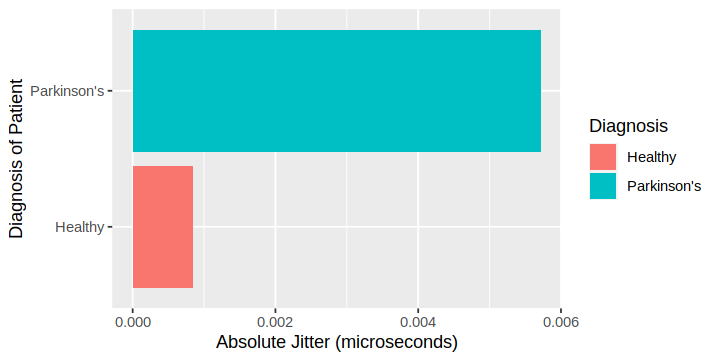

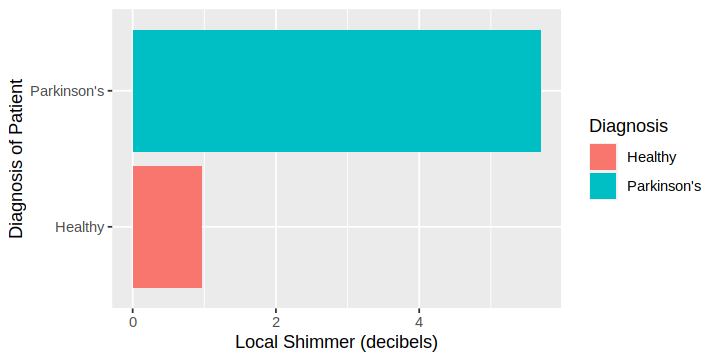

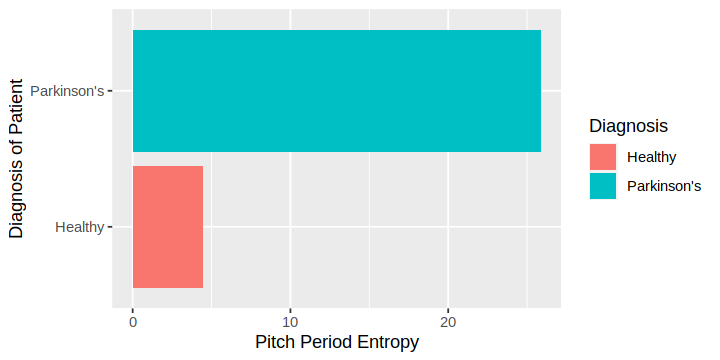

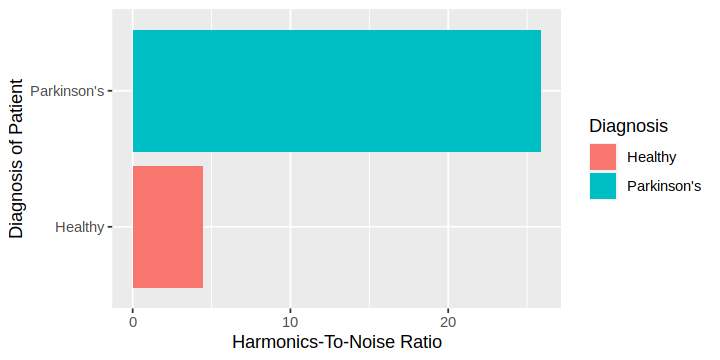

In [35]:
# preliminary data visualization - exploratory data analysis of training data

options(repr.plot.width = 6, repr.plot.height = 3)

jitter_plot <- parkinsons_train |>
    ggplot(aes(x = jitter, y = status, fill = status)) + 
    geom_bar(stat = "identity") +
    xlab("Absolute Jitter (microseconds)") + 
    ylab("Diagnosis of Patient") + 
    labs(fill = "Diagnosis")

shimmer_plot <- parkinsons_train |>
    ggplot(aes(x = shimmer, y = status, fill = status)) + 
    geom_bar(stat = "identity") +
    xlab("Local Shimmer (decibels)") + 
    ylab("Diagnosis of Patient") + 
    labs(fill = "Diagnosis")

ppe_plot <- parkinsons_train |>
    ggplot(aes(x = ppe, y = status, fill = status)) + 
    geom_bar(stat = "identity") +
    xlab("Pitch Period Entropy") + 
    ylab("Diagnosis of Patient") + 
    labs(fill = "Diagnosis") 

hnr_plot <- parkinsons_train |>
    ggplot(aes(x = ppe, y = status, fill = status)) + 
    geom_bar(stat = "identity") +
    xlab("Harmonics-To-Noise Ratio") + 
    ylab("Diagnosis of Patient") + 
    labs(fill = "Diagnosis")

jitter_plot
shimmer_plot
ppe_plot
hnr_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


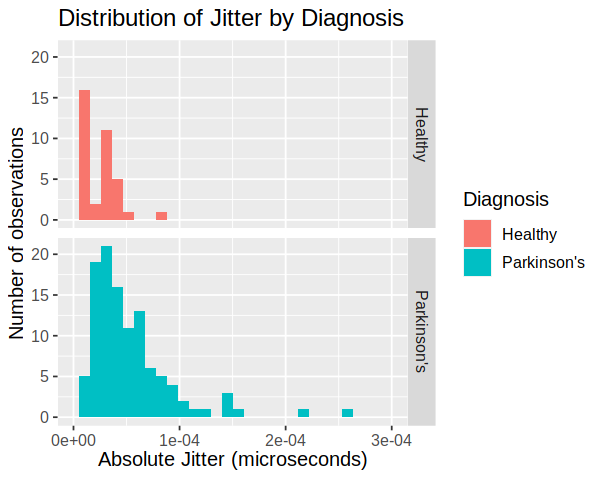

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


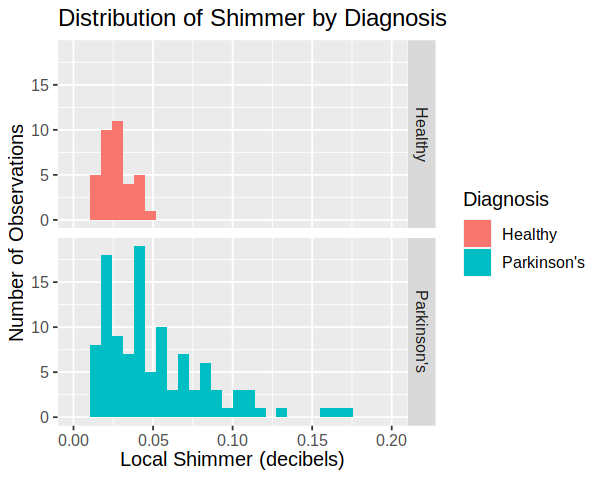

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


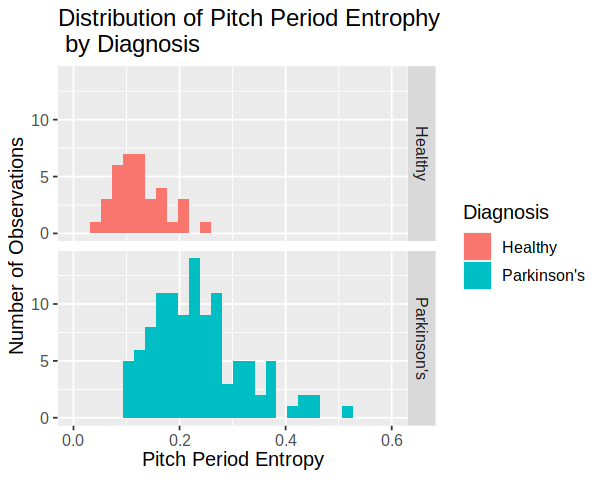

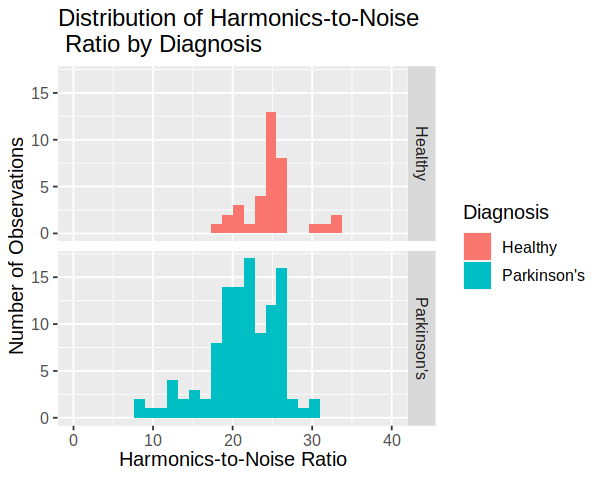

In [60]:
# preliminary data visualization - exploratory data analysis of training data

options(repr.plot.width = 5, repr.plot.height = 4)
jitter_plot <- parkinsons_train |>
    ggplot(aes(x = jitter, fill = status)) +
    geom_histogram() +
    facet_grid(rows = vars(status)) +
    labs(x = "Absolute Jitter (microseconds)",
         y = "Number of observations",
         fill = "Diagnosis") +
    scale_x_continuous(limits = c(0, 0.0003)) +
    ggtitle("Distribution of Jitter by Diagnosis") +
    theme(text = element_text(size = 12))

jitter_plot

shimmer_plot <- parkinsons_train |>
    ggplot(aes(x = shimmer, fill = status)) +
    geom_histogram() +
    facet_grid(rows = vars(status)) +
    labs(x = "Local Shimmer (decibels)",
         y = "Number of Observations",
         fill = "Diagnosis") +
    scale_x_continuous(limits = c(0, 0.20)) +
    ggtitle("Distribution of Shimmer by Diagnosis") +
    theme(text = element_text(size = 12))

shimmer_plot

ppe_plot <- parkinsons_train |>
    ggplot(aes(x = ppe, fill = status)) +
    geom_histogram() +
    facet_grid(rows = vars(status)) +
    labs(x = "Pitch Period Entropy",
         y = "Number of Observations",
         fill = "Diagnosis") +
        scale_x_continuous(limits = c(0, 0.6)) +
    ggtitle("Distribution of Pitch Period Entrophy \n by Diagnosis") +
    theme(text = element_text(size = 12))

ppe_plot

hnr_plot <- parkinsons_train |>
    ggplot(aes(x = hnr, fill = status)) +
    geom_histogram() +
    facet_grid(rows = vars(status)) +
    labs(x = "Harmonics-to-Noise Ratio",
         y = "Number of Observations",
         fill = "Diagnosis") +
    scale_x_continuous(limits = c(0, 40)) +
    ggtitle("Distribution of Harmonics-to-Noise \n Ratio by Diagnosis") +
    theme(text = element_text(size = 12))

hnr_plot

## References

Harel, B., Cannizzaro, M., & Snyder, P. J. (2004). Variability in fundamental frequency during speech in prodromal and incipient parkinson's disease: A longitudinal case study. Brain and Cognition, 56(1), 24-29. https://doi.org/10.1016/j.bandc.2004.05.002

Jiménez-Jiménez, F. J., Gamboa, J., Nieto, A., Guerrero, J., Orti-Pareja, M., Molina, J. A., García-Albea, E., & Cobeta, I. (1997). Acoustic voice analysis in untreated patients with parkinson's disease. Parkinsonism & Related Disorders, 3(2), 111-116. https://doi.org/10.1016/S1353-8020(97)00007-2

Little, M. A., McSharry, P. E., Hunter, E. J., Spielman, J., & Ramig, L. O. (2009). Suitability of dysphonia measurements for telemonitoring of parkinson's disease. IEEE Transactions on Biomedical Engineering, 56(4), 1015-1022. https://doi.org/10.1109/TBME.2008.2005954

Ma, A., Lau, K. K., & Thyagarajan, D. (2020). Voice changes in Parkinson’s disease: What are they telling us?. Journal of Clinical Neuroscience, 72, 1-7. https://doi.org/10.1016/j.jocn.2019.12.029